# Customer Segmentation using Clustering
In today’s competitive market, businesses collect large amounts of customer data, but raw data alone does not provide direct value. To make data-driven decisions, it is essential to identify patterns and group customers with similar behaviors, preferences, or demographics.

This project focuses on applying unsupervised machine learning techniques — specifically clustering algorithms — to segment customers into meaningful groups. By understanding these customer segments, businesses can:

* Personalize marketing strategies

* Improve customer experience

* Identify potential high-value customers

* Reduce churn by targeting the right audience with the right message

# We will use Python along with libraries such as Pandas, NumPy, Matplotlib, and Scikit-learn to:

* Clean and preprocess the dataset

* Perform exploratory data analysis (EDA) to understand key features

* Apply clustering algorithms (e.g., K-Means)

* Visualize clusters for better interpretability

* Derive business insights from the segmentation results

In [ ]:
#Library import
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create config.yaml file with CSV info
yaml_data = {
    'data_source': {
        'file_path': 'anz.csv',
        'file_type': 'csv'
    }
}

# Save as config.yaml
with open("config.yaml", "w") as f:
    yaml.dump(yaml_data, f)

print(" config.yaml created successfully.")


 config.yaml created successfully.


In [ ]:
# Load config
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

# Read values from config
file_path = config["data_source"]["file_path"]
file_type = config["data_source"]["file_type"]

# Load the CSV

df = pd.read_csv(file_path)

# Show data
df.head()


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [ ]:

# 1. Remove rows with more than 70% missing values
threshold = df.shape[1] * 0.7
df_clean = df[df.isnull().sum(axis=1) < threshold]

# 2. Impute remaining missing values with mean (only numeric columns)
df_clean = df_clean.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)

# 3. Remove duplicates
df_clean = df_clean.drop_duplicates()

#  Check result
print(" Shape after cleaning:", df_clean.shape)
print(" Null values remaining:\n", df_clean.isnull().sum())
df_clean.head()


 Shape after cleaning: (12043, 23)
 Null values remaining:
 status                   0
card_present_flag        0
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code            0
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,0.0,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,0.0,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,0.0,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,0.0,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,0.0,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


 **Univariate Analysis**

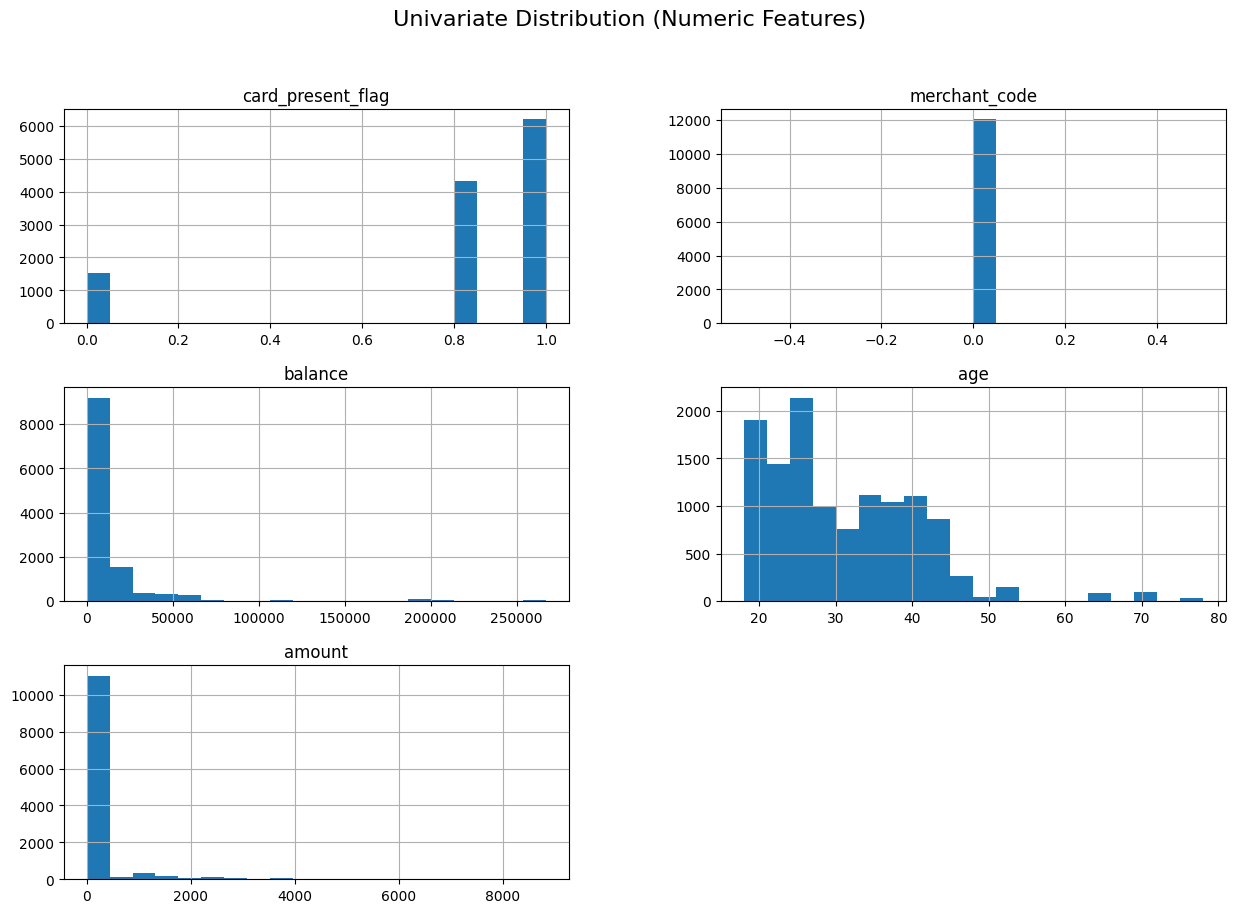

In [ ]:
# Automatically detect numeric columns
numeric_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns

# Plot histogram for numeric columns
df_clean[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle(" Univariate Distribution (Numeric Features)", fontsize=16)
plt.show()

**Bivariate Analysis**

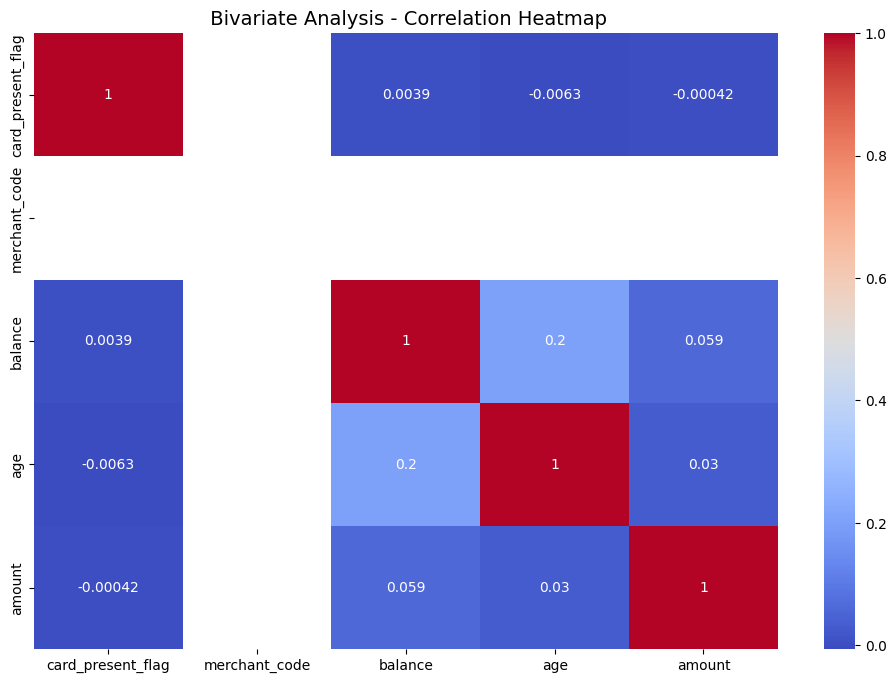

In [ ]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title(" Bivariate Analysis - Correlation Heatmap", fontsize=14)
plt.show()


**Multivariate Analysis (Pairplot)**

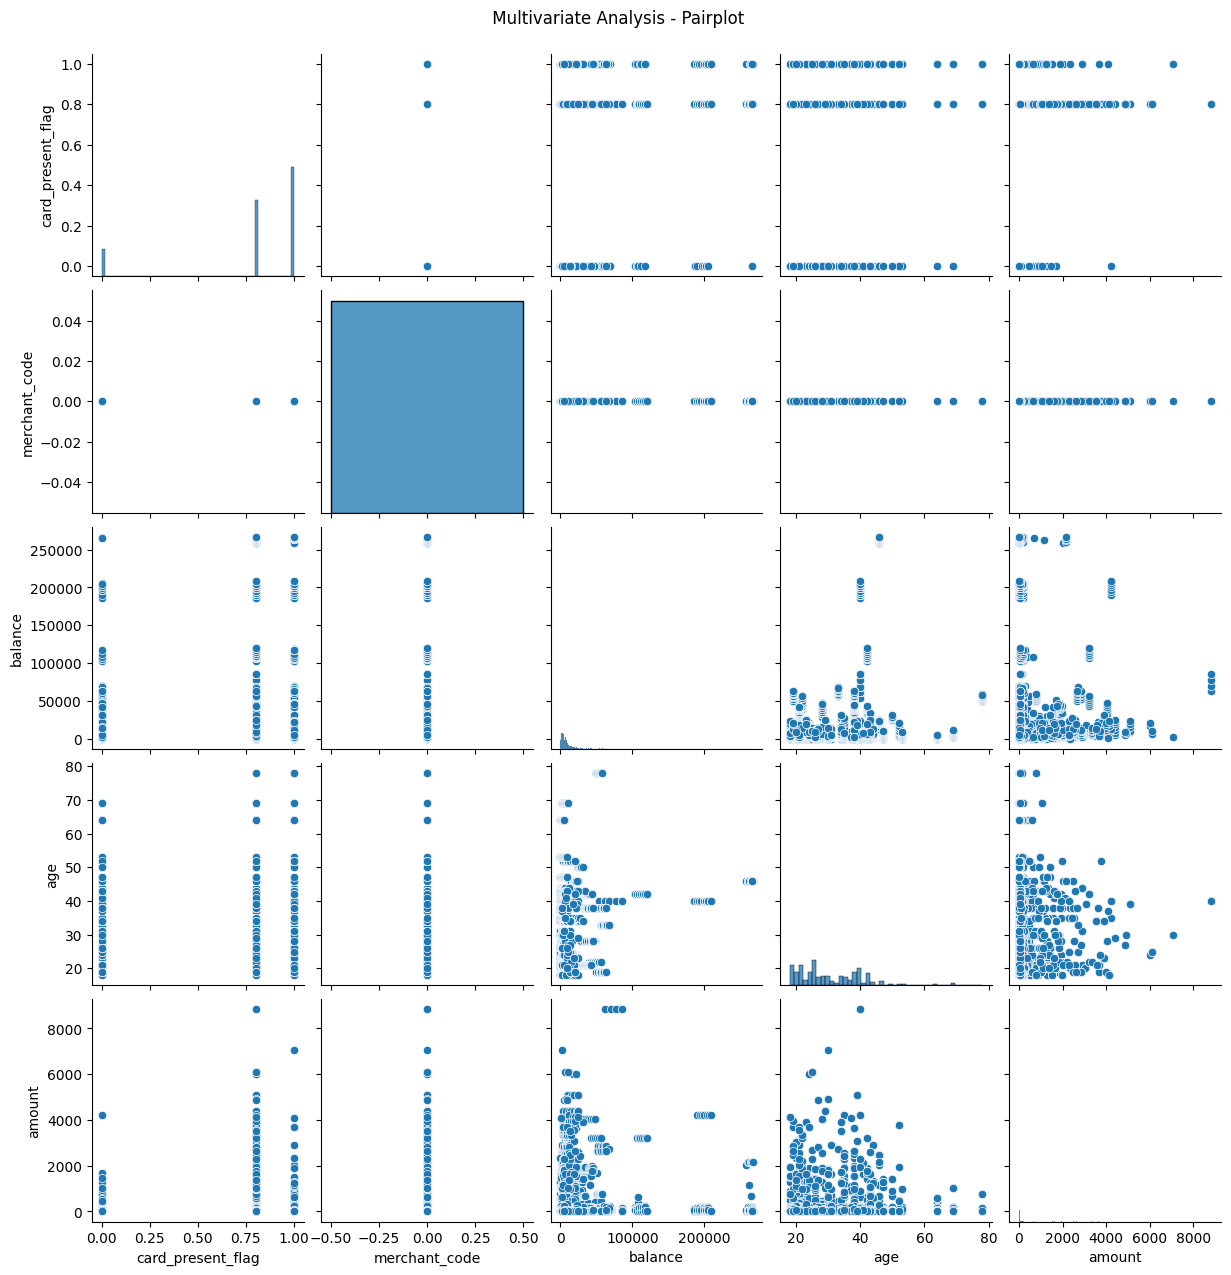

In [ ]:
# Pairplot for first few numeric columns
sns.pairplot(df_clean[numeric_cols[:]])
plt.suptitle(" Multivariate Analysis - Pairplot", y=1.02)
plt.show()

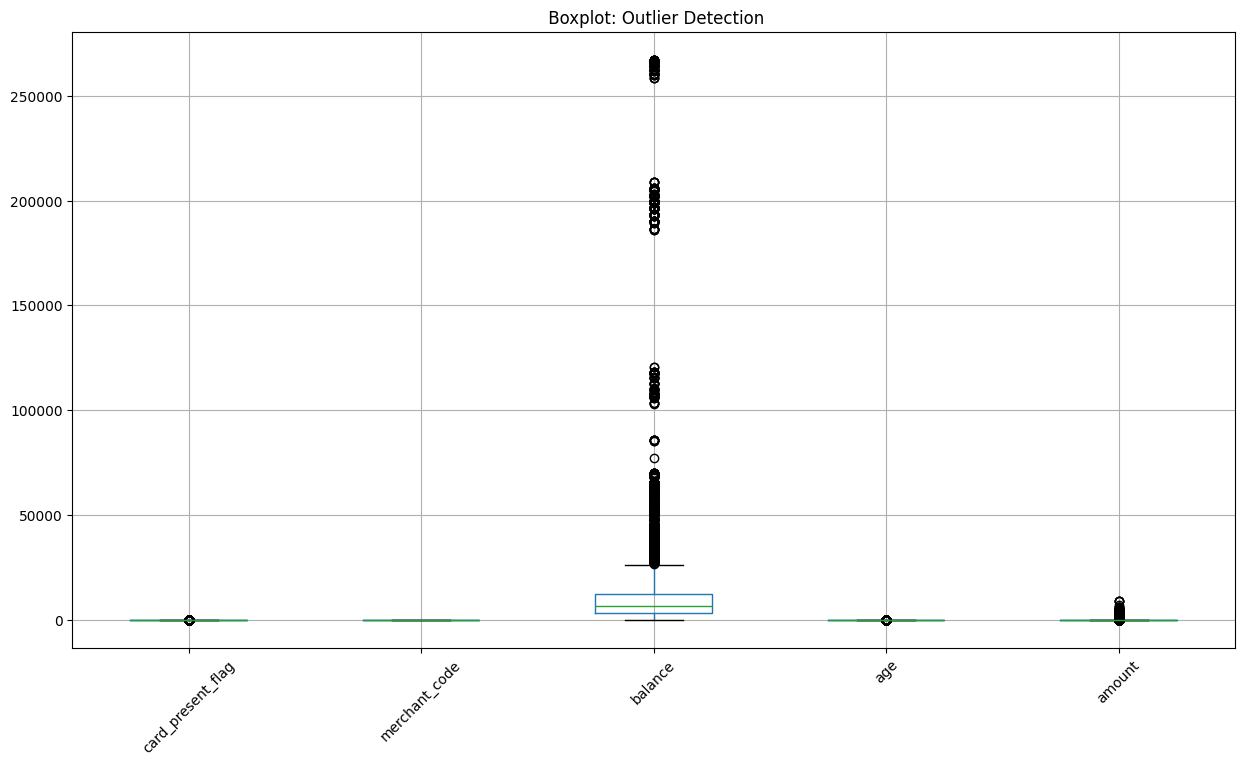

In [ ]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
df_clean[numeric_cols].boxplot()
plt.title(" Boxplot: Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_no_outliers = remove_outliers_iqr(df_clean, numeric_cols)

print("Shape after removing outliers:", df_no_outliers.shape)

Shape after removing outliers: (7754, 23)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df_no_outliers.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print(" Scaling complete. All numeric features are between 0 and 1.")
df_scaled[numeric_cols].head()

 Scaling complete. All numeric features are between 0 and 1.


,card_present_flag,merchant_code,balance,age,amount
0,1.0,0.0,0.001274,0.228571,0.142744
2,1.0,0.0,0.000198,0.571429,0.055860
3,1.0,0.0,0.076715,0.628571,0.360615
4,1.0,0.0,0.000642,0.228571,0.027842
6,1.0,0.0,0.045229,0.714286,0.538801


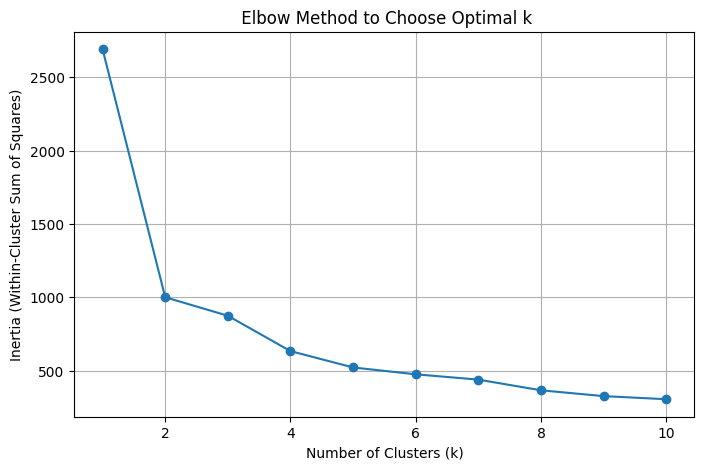

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[numeric_cols])
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title(' Elbow Method to Choose Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Apply KMeans with chosen k
kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled["cluster"] = kmeans.fit_predict(df_scaled[numeric_cols])

print("Clustering complete. Sample clusters:")
df_scaled["cluster"].value_counts()

Clustering complete. Sample clusters:


,count
cluster,
1,5395
0,2359


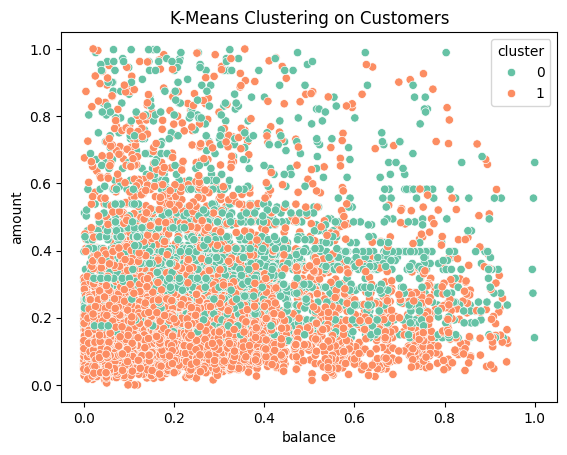

In [ ]:
sns.scatterplot(data=df_scaled, x="balance", y="amount", hue="cluster", palette="Set2")
plt.title("K-Means Clustering on Customers")
plt.show()


In [ ]:
# Group by cluster and get averages
cluster_profile = df_scaled.groupby("cluster")[numeric_cols].mean()
cluster_profile

,card_present_flag,merchant_code,balance,age,amount
cluster,,,,,
0,0.0,0.0,0.310467,0.321262,0.371094
1,1.0,0.0,0.234766,0.318883,0.213209


In [ ]:
# labels
df_scaled['cluster_label'] = df_scaled['cluster'].map({
    0: 'Low Value Customers',
    1: 'High Value Customers'
})
df_scaled

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,cluster,cluster_label
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,0.0,Diana,...,QLD,2018-08-01T01:01:15.000+0000,0.142744,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,High Value Customers
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,0.0,Michael,...,NSW,2018-08-01T01:26:15.000+0000,0.055860,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,High Value Customers
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,0.0,Rhonda,...,QLD,2018-08-01T01:38:45.000+0000,0.360615,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,1,High Value Customers
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,0.0,Diana,...,QLD,2018-08-01T01:51:15.000+0000,0.027842,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1,High Value Customers
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,0.0,Kristin,...,VIC,2018-08-01T02:23:04.000+0000,0.538801,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit,1,High Value Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12035,posted,0.0,NaN,ACC-1973887809,AUD,115.78 -31.90,PAYMENT,NaN,0.0,Antonio,...,NaN,2018-10-31T23:00:00.000+0000,0.255436,dda53e538c5b4d5aae2481be22e60440,Australia,CUS-1646621553,NaN,debit,0,Low Value Customers
12036,posted,0.0,NaN,ACC-1349834573,AUD,145.17 -37.84,PAYMENT,NaN,0.0,Matthew,...,NaN,2018-10-31T23:00:00.000+0000,0.281952,df15d6f039554dcbb3ca02631ce22068,Australia,CUS-1790886359,NaN,debit,0,Low Value Customers
12037,posted,0.0,NaN,ACC-240804743,AUD,121.48 -30.75,PAYMENT,NaN,0.0,Kenneth,...,NaN,2018-10-31T23:00:00.000+0000,0.343822,c7bc398b9eb04e73933dc6d5a7beae0b,Australia,CUS-261674136,NaN,debit,0,Low Value Customers
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,0.0,Robert,...,NSW,2018-10-31T23:21:46.000+0000,0.563638,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,1,High Value Customers


In [ ]:
df_scaled.to_csv("clustered_customers.csv", index=False)
print("File saved as clustered_customers.csv")

File saved as clustered_customers.csv


### 📌 Conclusion

- **Cluster 0 – Low Value Customers**  
  Have lower balances and smaller transaction amounts. These users may require promotions or loyalty programs.

- **Cluster 1 – High Value Customers**  
  Typically have higher balances and spend more. These are potential VIP customers for premium services.

**Business Impact:**  
These customer segments can be used for personalized marketing, targeted upselling, and better product recommendations.